In [2]:
%%time
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

#for plot with ATLAS styple
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import mplhep as hep
#hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.ATLAS)
plt.style.use(hep.style.ATLAS)
#be able to read root files.
#and convert to numpy or pandas
import uproot
import gc

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

import cell_data
from glob import glob 


files ="data/ttbar-train/train-1.h5"
et, ex, ey, noise, phi, eta, labels = cell_data.get_data(files,
                                                         labelkey="MET_Calo_pt")
gc.collect()

noise_ratio = np.nan_to_num(et/noise)


phi_bins = 64
eta_bins = 50
x_bin = np.linspace(-3.15, 3.15, num=phi_bins+1) #phi
y_bin = np.linspace(-5, 5, num=eta_bins+1) #eta
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 124 ms, sys: 110 ms, total: 234 ms
Wall time: 259 ms


<timed exec>:34: RuntimeWarning: invalid value encountered in true_divide


In [3]:
phi.shape

(2000, 50, 64)

(array([ 14.,  42.,  81., 118., 143., 156., 194., 177., 155., 117., 120.,
        113.,  74.,  70.,  61.,  61.,  56.,  34.,  36.,  26.,  30.,  20.,
         12.,  12.,  13.,   7.,   8.,   9.,   6.,   4.,   3.,   9.,   3.,
          4.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   2.]),
 array([  683.49693451,   845.06393508,  1006.63093566,  1168.19793624,
         1329.76493682,  1491.3319374 ,  1652.89893798,  1814.46593856,
         1976.03293914,  2137.59993972,  2299.1669403 ,  2460.73394088,
         2622.30094146,  2783.86794204,  2945.43494262,  3107.0019432 ,
         3268.56894378,  3430.13594436,  3591.70294494,  3753.26994552,
         3914.8369461 ,  4076.40394668,  4237.97094726,  4399.53794784,
         4561.10494842,  4722.671949  ,  4884.23894958,  5045.80595016,
         5207.37295074,  5368.93995131,  5530.50695189,  5692.07395247,
         5853.

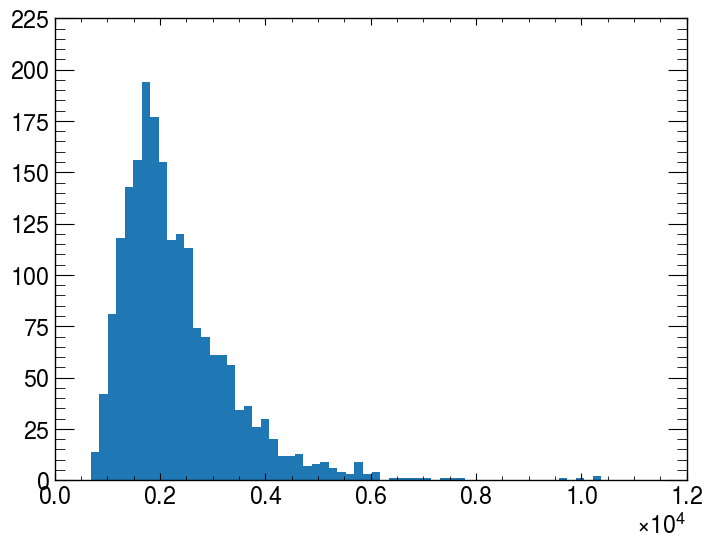

In [4]:
sumET = noise.sum(axis=(1,2))
plt.hist(sumET, bins=60)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13be082e0>, cbar=<matplotlib.colorbar.Colorbar object at 0x13d940610>, text=[])

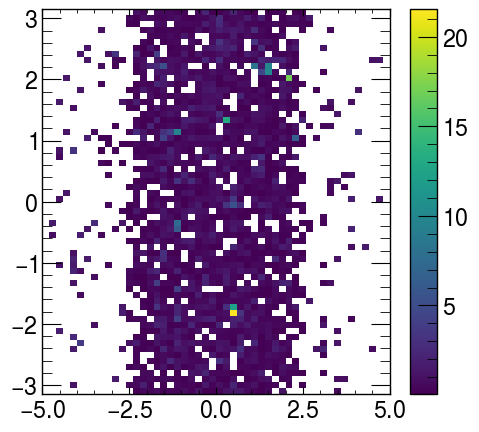

In [5]:
def get_img(data):
    data[data==0]=np.NaN
    return data

fig, axs = plt.subplots(1,1, figsize=(5,5))

hep.hist2dplot(get_img(data= et[3]), y_bin, x_bin, ax=axs)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13d647340>, cbar=<matplotlib.colorbar.Colorbar object at 0x13da04640>, text=[])

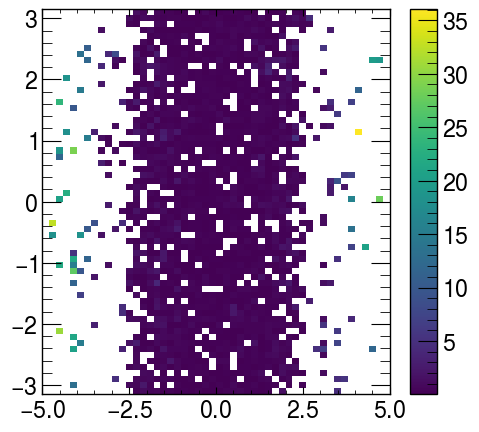

In [6]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
hep.hist2dplot(get_img(data=noise[3]),  y_bin, x_bin, ax=axs)

In [7]:
noise[2][noise[2]>1]

array([26.34392738, 26.34392738, 39.58272552, 23.38386536, 33.40697098,
       38.40143967, 15.89502621, 34.5548172 , 11.46505642, 15.42986965,
       21.83425522, 29.40440369, 18.32238007,  6.91766024,  7.24278307,
        9.67176437, 16.05538559, 16.16886711,  7.81903553,  3.00836372,
        7.10626078, 10.21589947,  2.93350291,  9.92433071,  5.76974154,
        9.56429672,  4.8424716 ,  9.63729525,  4.1138916 , 13.91477299,
        6.73174429,  2.37229538,  8.27978039, 13.897645  ,  4.75010824,
        4.1138916 ,  1.77154899,  6.44909334,  8.27978039,  5.52948451,
        2.75339699,  2.49047256,  1.63508272,  1.94443452,  4.4115448 ,
        1.5019567 ,  1.54264629,  4.43785024,  3.97959447,  1.94443452,
        1.51499391,  2.58865833,  1.04644454,  1.15422153,  1.21166182,
        5.50652695,  1.14645851,  1.33596814,  1.23123896,  1.04644454,
        4.93568039,  4.93568039,  3.97138876,  1.01444113,  4.43204308,
        2.8653903 ,  4.24992466,  2.8653903 ,  1.72730672,  1.34

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13dbb40d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x13dc5ea90>, text=[])

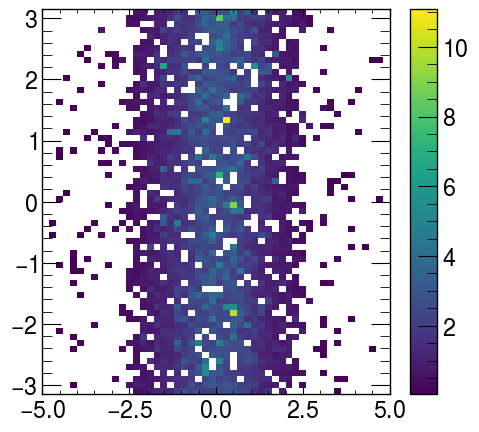

In [8]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
hep.hist2dplot(get_img(data=noise_ratio[3]),  y_bin, x_bin, ax=axs)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x13debeb80>, cbar=<matplotlib.colorbar.Colorbar object at 0x13debef70>, text=[])

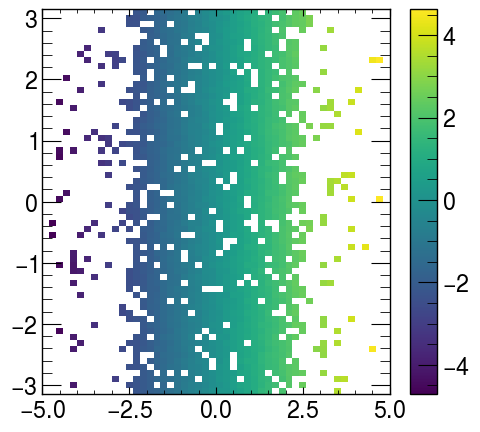

In [21]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
hep.hist2dplot(get_img(data=eta[3]),  y_bin, x_bin, ax=axs)

In [10]:
noise_ratio[5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03646101, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
stacks = np.stack([et, noise_ratio, phi, eta], axis=-1)

In [13]:
new_stack = stacks.reshape(-1, 50* 64, 4)

In [20]:
phi

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  